<a href="https://colab.research.google.com/github/MathieuFan22/Mirada-Examen-ML-M2-ISPM/blob/Mathieu/PoketraFinday-Mirada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
display(df.head())
print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the DataFrame:


,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  30000 non-null  object
 1   step            30000 non-null  int64 
 2   type            30000 non-null  object
 3   amount          30000 non-null  int64 
 4   customer_id     30000 non-null  object
 5   age             30000 non-null  int64 
 6   is_fraud        30000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.6+ MB

Descriptive Statistics:


,step,amount,age,is_fraud
count,30000.000000,3.000000e+04,30000.000000,30000.000000
mean,361.139733,1.474855e+05,34.516800,0.019833
std,207.894173,4.114664e+05,16.067294,0.139430
min,0.000000,1.000000e+02,18.000000,0.000000
25%,180.000000,1.750000e+04,23.000000,0.000000
50%,364.000000,4.930000e+04,28.000000,0.000000
75%,541.000000,1.360000e+05,43.000000,0.000000
max,719.000000,1.921400e+07,90.000000,1.000000


## Analyze Target Variable Distribution

### Subtask:
Examine the distribution of the `is_fraud` column to understand the balance between fraudulent and non-fraudulent transactions.


**Reasoning**:
To analyze the distribution of the `is_fraud` column, I will calculate its value counts and percentage, then visualize it with a count plot to understand the balance between fraudulent and non-fraudulent transactions.



Distribution of 'is_fraud' column:
is_fraud
0    29405
1      595
Name: count, dtype: int64

Percentage distribution of 'is_fraud' column:
is_fraud
0    98.016667
1     1.983333
Name: proportion, dtype: float64


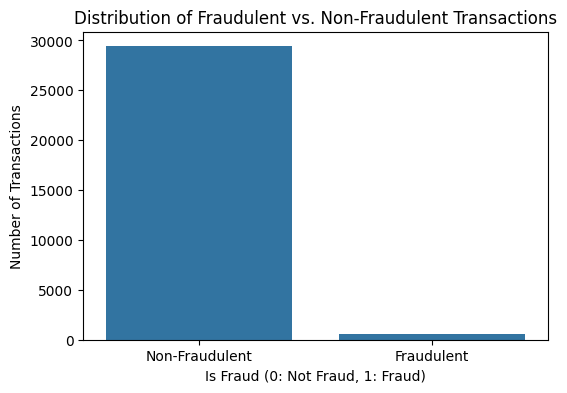

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Distribution of 'is_fraud' column:")
fraud_counts = df['is_fraud'].value_counts()
print(fraud_counts)

print("\nPercentage distribution of 'is_fraud' column:")
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_percentage)

plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud (0: Not Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

## Explore Categorical Features vs. `is_fraud`

### Subtask:
Investigate the relationship between categorical columns (e.g., 'type') and the 'is_fraud' target variable.


**Reasoning**:
To investigate the relationship between the 'type' column and the 'is_fraud' column, I will first group the DataFrame by 'type' and 'is_fraud' to count occurrences. Then, I will calculate the percentage of fraudulent transactions within each 'type' to understand their susceptibility. Finally, I will visualize these insights using a bar plot, clearly labeling axes and providing a descriptive title for easy interpretation.

**Reasoning**:
To analyze the relationship between the 'type' column and the 'is_fraud' column, I will calculate the counts and percentages of fraudulent transactions for each transaction type and then visualize these relationships using bar plots.




Relationship between 'type' and 'is_fraud':

Fraudulent transaction counts by type:


,count
type,
TRANSFER,527
PAYMENT,27
CASH_OUT,21
DEBIT,20



Total transaction counts by type:


,count
type,
PAYMENT,11150
TRANSFER,8160
CASH_OUT,7716
DEBIT,2974



Percentage of fraudulent transactions by type:


,count
type,
TRANSFER,6.458333
DEBIT,0.672495
CASH_OUT,0.272162
PAYMENT,0.242152


/tmp/ipython-input-2789294384.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_type_counts.index, y=fraud_type_counts.values, palette='viridis')


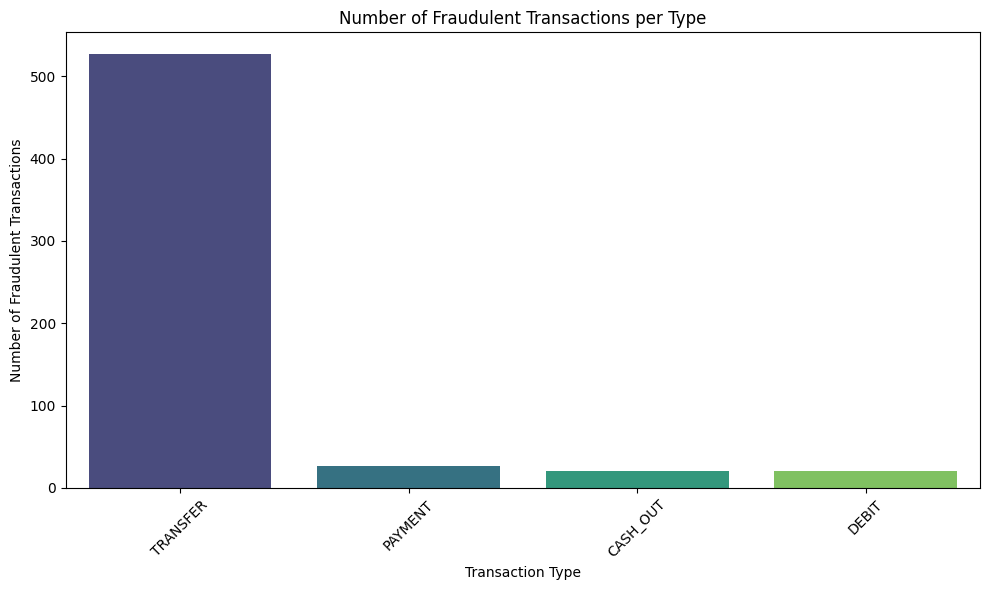

/tmp/ipython-input-2789294384.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_percentage_by_type.index, y=fraud_percentage_by_type.values, palette='plasma')


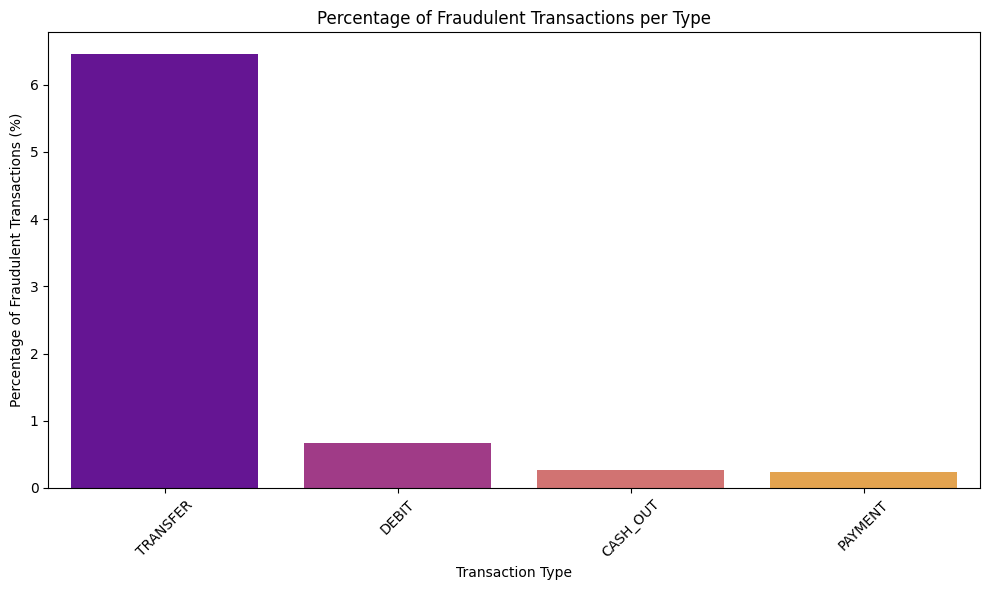

In [4]:
print("\nRelationship between 'type' and 'is_fraud':")

# Calculate counts of fraudulent transactions for each type
fraud_type_counts = df[df['is_fraud'] == 1]['type'].value_counts()
print("\nFraudulent transaction counts by type:")
display(fraud_type_counts)

# Calculate total transactions for each type
total_type_counts = df['type'].value_counts()
print("\nTotal transaction counts by type:")
display(total_type_counts)

# Calculate percentage of fraudulent transactions for each type
fraud_percentage_by_type = (fraud_type_counts / total_type_counts * 100).fillna(0).sort_values(ascending=False)
print("\nPercentage of fraudulent transactions by type:")
display(fraud_percentage_by_type)

# Plotting the counts of fraudulent transactions by type
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_type_counts.index, y=fraud_type_counts.values, palette='viridis')
plt.title('Number of Fraudulent Transactions per Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the percentage of fraudulent transactions by type
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage_by_type.index, y=fraud_percentage_by_type.values, palette='plasma')
plt.title('Percentage of Fraudulent Transactions per Type')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage of Fraudulent Transactions (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block produced `FutureWarning` messages related to the `palette` argument in `seaborn.barplot`. To address these warnings and ensure compatibility with future Seaborn versions, I will modify the `sns.barplot` calls to include the `hue` argument with the same variable as `x` and set `legend=False`.




Relationship between 'type' and 'is_fraud':

Fraudulent transaction counts by type:


,count
type,
TRANSFER,527
PAYMENT,27
CASH_OUT,21
DEBIT,20



Total transaction counts by type:


,count
type,
PAYMENT,11150
TRANSFER,8160
CASH_OUT,7716
DEBIT,2974



Percentage of fraudulent transactions by type:


,count
type,
TRANSFER,6.458333
DEBIT,0.672495
CASH_OUT,0.272162
PAYMENT,0.242152


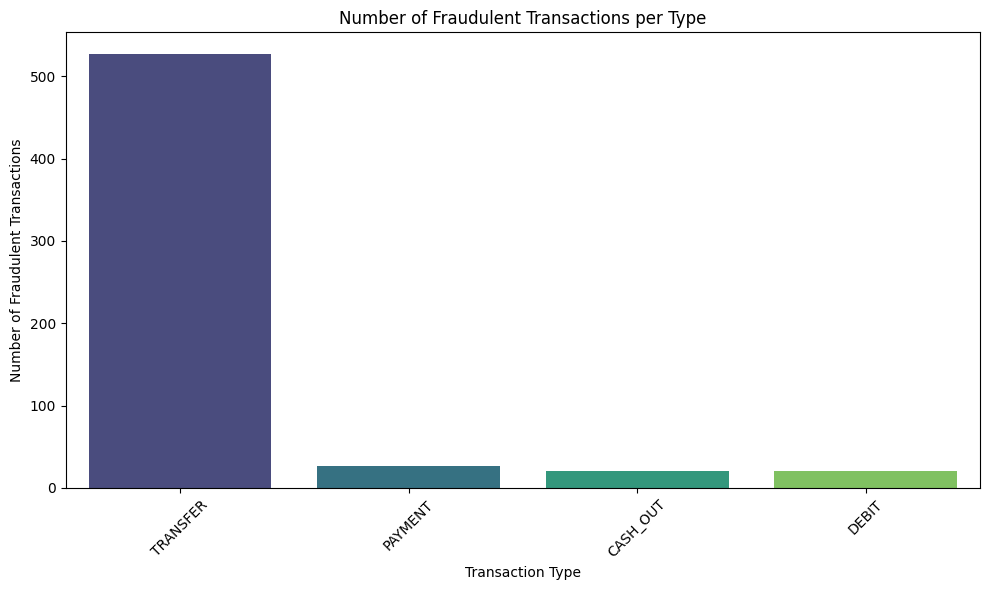

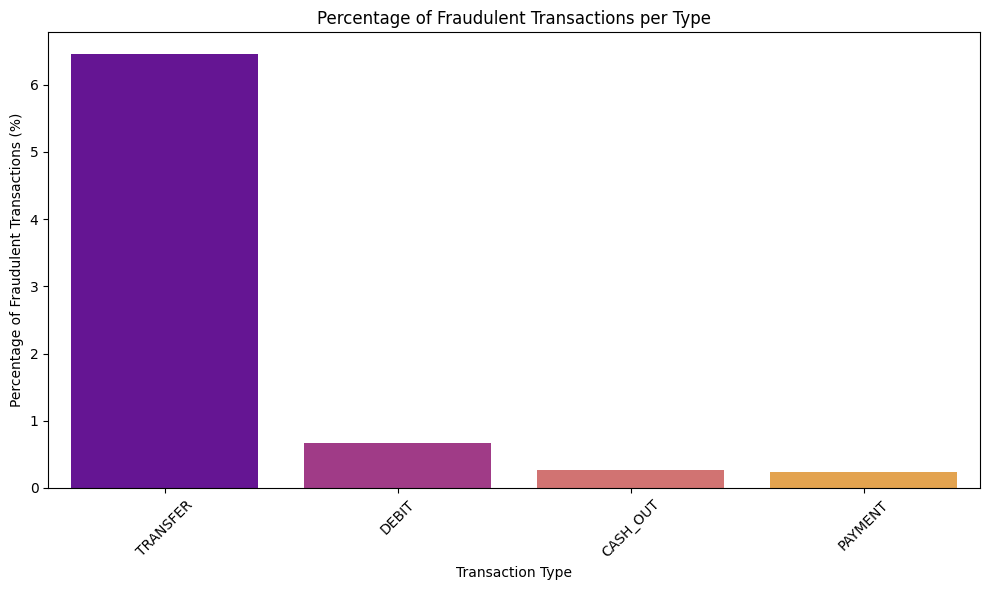

In [5]:
print("\nRelationship between 'type' and 'is_fraud':")

# Calculate counts of fraudulent transactions for each type
fraud_type_counts = df[df['is_fraud'] == 1]['type'].value_counts()
print("\nFraudulent transaction counts by type:")
display(fraud_type_counts)

# Calculate total transactions for each type
total_type_counts = df['type'].value_counts()
print("\nTotal transaction counts by type:")
display(total_type_counts)

# Calculate percentage of fraudulent transactions for each type
fraud_percentage_by_type = (fraud_type_counts / total_type_counts * 100).fillna(0).sort_values(ascending=False)
print("\nPercentage of fraudulent transactions by type:")
display(fraud_percentage_by_type)

# Plotting the counts of fraudulent transactions by type
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_type_counts.index, y=fraud_type_counts.values, hue=fraud_type_counts.index, palette='viridis', legend=False)
plt.title('Number of Fraudulent Transactions per Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the percentage of fraudulent transactions by type
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage_by_type.index, y=fraud_percentage_by_type.values, hue=fraud_percentage_by_type.index, palette='plasma', legend=False)
plt.title('Percentage of Fraudulent Transactions per Type')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage of Fraudulent Transactions (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Explore Numerical Features vs. `is_fraud`

### Subtask:
Analyze the distributions of numerical columns (e.g., 'amount', 'step', 'age') and their relationship with the 'is_fraud' target variable.


```markdown
**Reasoning**:
To analyze the distributions of numerical columns ('amount', 'step', 'age') and their relationship with the 'is_fraud' target variable, I will first iterate through each numerical column.

For each column, I will calculate and display descriptive statistics separately for fraudulent and non-fraudulent transactions. This will provide a quantitative overview of how these features differ between the two groups.

Following that, I will create a pair of KDE plots for each numerical column, visualizing its distribution for both fraudulent and non-fraudulent transactions on the same graph. This will allow for a clear visual comparison of their distributions and potential separation.
```

**Reasoning**:
To analyze the relationship between numerical features and the 'is_fraud' target variable, I will calculate descriptive statistics and generate KDE plots for each numerical column ('amount', 'step', 'age'), comparing fraudulent and non-fraudulent transactions.




--- Analyzing 'amount' vs. 'is_fraud' ---

Descriptive statistics for non-fraudulent amount:


,amount
count,2.940500e+04
mean,1.406155e+05
std,3.767579e+05
min,1.000000e+02
25%,1.740000e+04
50%,4.750000e+04
75%,1.305000e+05
max,1.921400e+07



Descriptive statistics for fraudulent amount:


,amount
count,5.950000e+02
mean,4.869998e+05
std,1.185774e+06
min,1.100000e+03
25%,1.100000e+05
50%,1.550000e+05
75%,2.550000e+05
max,1.655800e+07


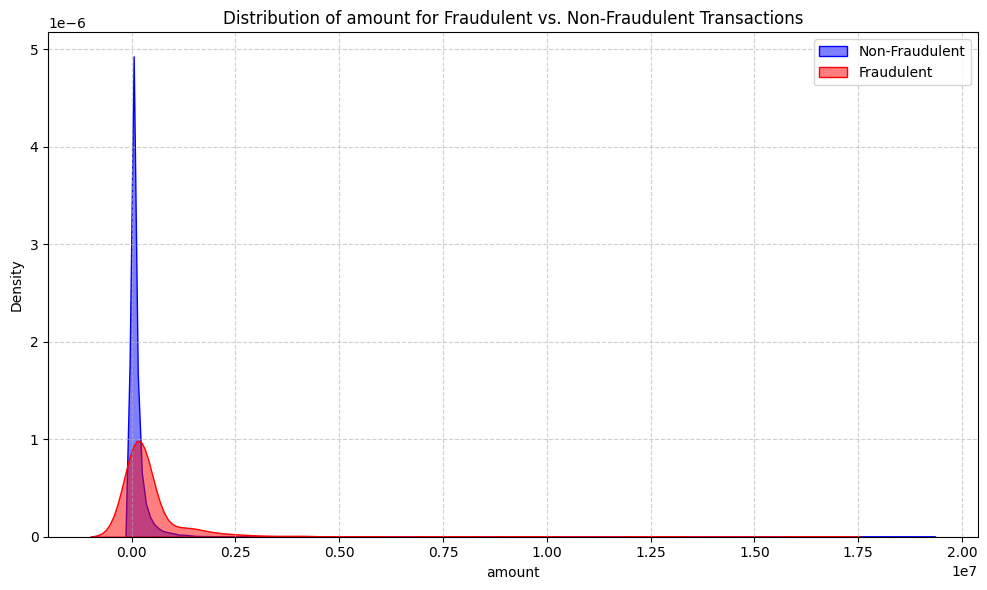


--- Analyzing 'step' vs. 'is_fraud' ---

Descriptive statistics for non-fraudulent step:


,step
count,29405.000000
mean,360.883795
std,207.974670
min,0.000000
25%,180.000000
50%,360.000000
75%,541.000000
max,719.000000



Descriptive statistics for fraudulent step:


,step
count,595.000000
mean,373.788235
std,203.647048
min,1.000000
25%,188.000000
50%,380.000000
75%,545.500000
max,718.000000


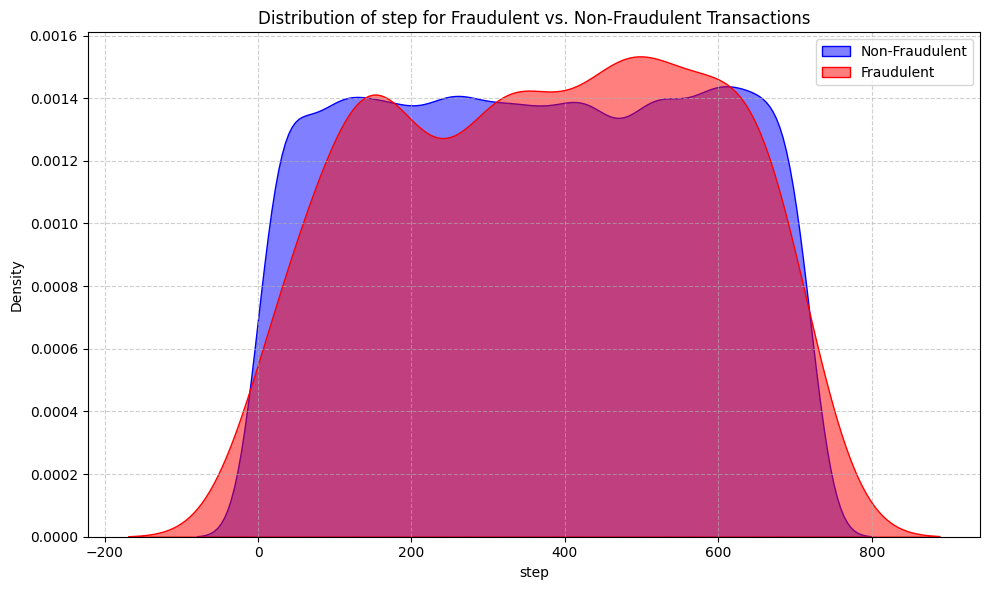


--- Analyzing 'age' vs. 'is_fraud' ---

Descriptive statistics for non-fraudulent age:


,age
count,29405.000000
mean,34.532903
std,16.057592
min,18.000000
25%,23.000000
50%,28.000000
75%,43.000000
max,90.000000



Descriptive statistics for fraudulent age:


,age
count,595.000000
mean,33.721008
std,16.534002
min,18.000000
25%,22.000000
50%,27.000000
75%,40.000000
max,88.000000


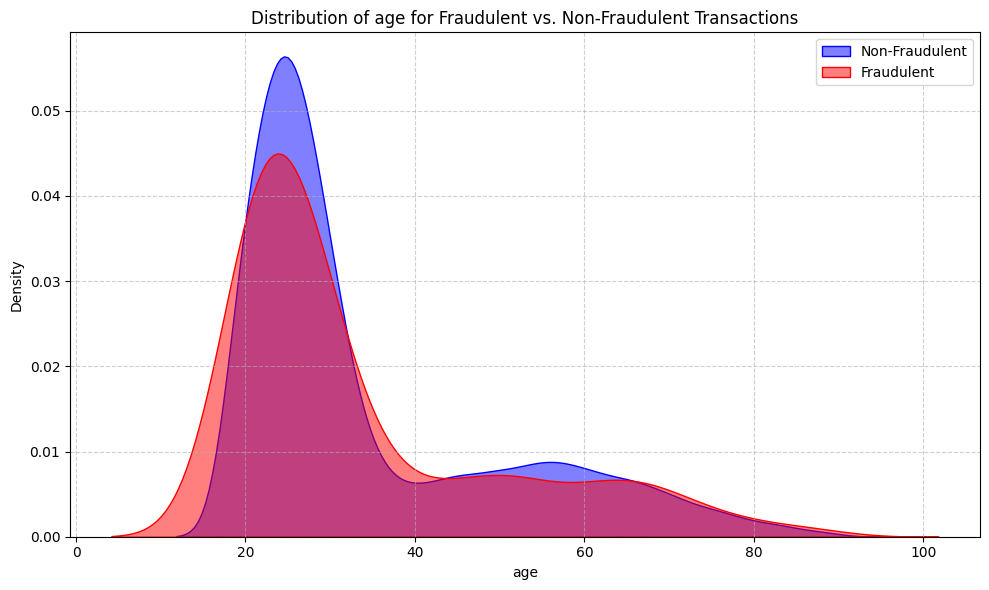

In [6]:
numerical_cols = ['amount', 'step', 'age']

for col in numerical_cols:
    print(f"\n--- Analyzing '{col}' vs. 'is_fraud' ---")

    # Descriptive statistics for non-fraudulent transactions
    print(f"\nDescriptive statistics for non-fraudulent {col}:")
    display(df[df['is_fraud'] == 0][col].describe())

    # Descriptive statistics for fraudulent transactions
    print(f"\nDescriptive statistics for fraudulent {col}:")
    display(df[df['is_fraud'] == 1][col].describe())

    # KDE plot for comparison
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df['is_fraud'] == 0][col], label='Non-Fraudulent', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(df[df['is_fraud'] == 1][col], label='Fraudulent', fill=True, alpha=0.5, color='red')
    plt.title(f'Distribution of {col} for Fraudulent vs. Non-Fraudulent Transactions')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

## Handle Missing Data

### Subtask:
Identify and address any missing values found in the dataset through appropriate imputation or removal strategies.


**Reasoning**:
To identify if there are any missing values in the dataset, I will calculate the sum of null values for each column in the DataFrame and display the results.



In [7]:
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found in the DataFrame.")
else:
    print("\nTotal missing values found in the DataFrame.")

Missing values per column:
Series([], dtype: int64)
No missing values found in the DataFrame.


## Remove Unnecessary Columns

### Subtask:
Identify and drop columns that are not relevant for the analysis or prediction of fraud (e.g., unique identifiers like 'transaction_id', 'customer_id').


**Reasoning**:
To remove the irrelevant columns, I will identify 'transaction_id' and 'customer_id' and drop them from the DataFrame, then display the first few rows to confirm the changes.



In [8]:
columns_to_drop = ['transaction_id', 'customer_id']

print(f"Dropping columns: {columns_to_drop}")
df = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
display(df.head())

Dropping columns: ['transaction_id', 'customer_id']
DataFrame after dropping columns:


,step,type,amount,age,is_fraud
0,421,PAYMENT,311000,24,0
1,325,PAYMENT,399600,25,0
2,565,PAYMENT,7500,38,0
3,511,TRANSFER,94000,26,0
4,63,CASH_OUT,15000,26,0


## Prepare Categorical Variables

### Subtask:
Transform categorical variables (e.g., 'type') into a suitable numerical format for potential machine learning model building, such as one-hot encoding.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 30,000 entries and 7 columns, with no missing values across any column.
*   The `amount` column exhibits a wide range (100 to $1.92 \times 10^7), indicating potential skewness or outliers.
*   Only **1.98%** of transactions are fraudulent (595 out of 30,000), highlighting a significant class imbalance.
*   **TRANSFER** transactions show the highest susceptibility to fraud, with approximately **6.46%** of all `TRANSFER` transactions being fraudulent. In contrast, `DEBIT`, `CASH_OUT`, and `PAYMENT` types have much lower fraud percentages (0.67%, 0.27%, and 0.24% respectively).
*   Fraudulent transactions tend to involve significantly **higher amounts** (mean of approximately $486,999) compared to non-fraudulent transactions (mean of approximately $140,615).
*   The `step` and `age` numerical features show very similar distributions for both fraudulent and non-fraudulent transactions, suggesting they are not strong indicators of fraud.
*   No missing values were found in the dataset.
*   Irrelevant columns such as `transaction_id` and `customer_id` were successfully removed from the DataFrame.

### Insights or Next Steps

*   The severe class imbalance in the `is_fraud` column (1.98% fraudulent) will require special handling during model training (e.g., oversampling, undersampling, or using algorithms robust to imbalance) to prevent models from being biased towards the majority class.
*   Given that 'amount' is a strong differentiator and 'TRANSFER' transactions have a high fraud rate, future feature engineering could focus on creating interaction features involving `amount` and `type`, or transforming `amount` (e.g., log transformation) to handle its skewed distribution.
